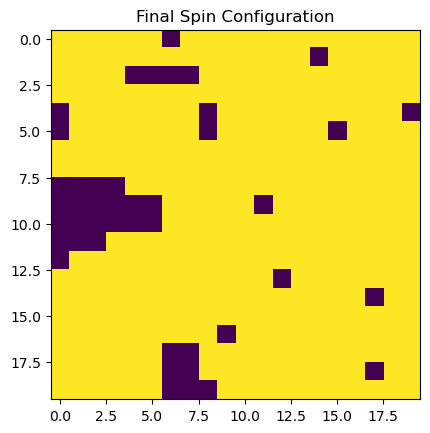

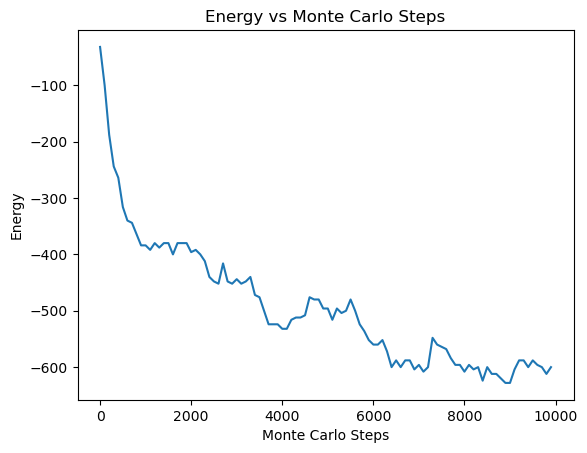

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize the spin configuration randomly
def initialize_spin_configuration(size):
    return np.random.choice([-1, 1], size=(size, size))

# Function to calculate the energy of the system
def calculate_energy(spins, J):
    energy = 0
    for i in range(spins.shape[0]):
        for j in range(spins.shape[1]):
            energy += -J * spins[i, j] * (spins[(i + 1) % spins.shape[0], j] + spins[i, (j + 1) % spins.shape[1]])
    return energy

# Function to perform a Monte Carlo step using the Metropolis algorithm
def monte_carlo_step(spins, J, temperature):
    i, j = np.random.randint(spins.shape[0]), np.random.randint(spins.shape[1])
    dE = 2 * J * spins[i, j] * (spins[(i + 1) % spins.shape[0], j] + spins[(i - 1) % spins.shape[0], j] +
                                 spins[i, (j + 1) % spins.shape[1]] + spins[i, (j - 1) % spins.shape[1]])
    
    if dE < 0 or np.random.random() < np.exp(-dE / temperature):
        spins[i, j] *= -1

# Function to perform the Monte Carlo simulation
def monte_carlo_simulation(size, J, temperature, num_steps):
    spins = initialize_spin_configuration(size)
    energies = []

    for step in range(num_steps):
        monte_carlo_step(spins, J, temperature)
        if step % 100 == 0:
            energies.append(calculate_energy(spins, J))

    return spins, np.array(energies)

# Parameters
size = 20
J = 1.0
temperature = 2.0
num_steps = 10000

# Perform the simulation
final_spin_configuration, energies = monte_carlo_simulation(size, J, temperature, num_steps)

# Plot the final spin configuration
plt.imshow(final_spin_configuration)#, cmap='binary', interpolation='nearest')
plt.title('Final Spin Configuration')
plt.show()

# Plot the energy as a function of Monte Carlo steps
plt.plot(np.arange(0, num_steps, 100), energies)
plt.xlabel('Monte Carlo Steps')
plt.ylabel('Energy')
plt.title('Energy vs Monte Carlo Steps')
plt.show()


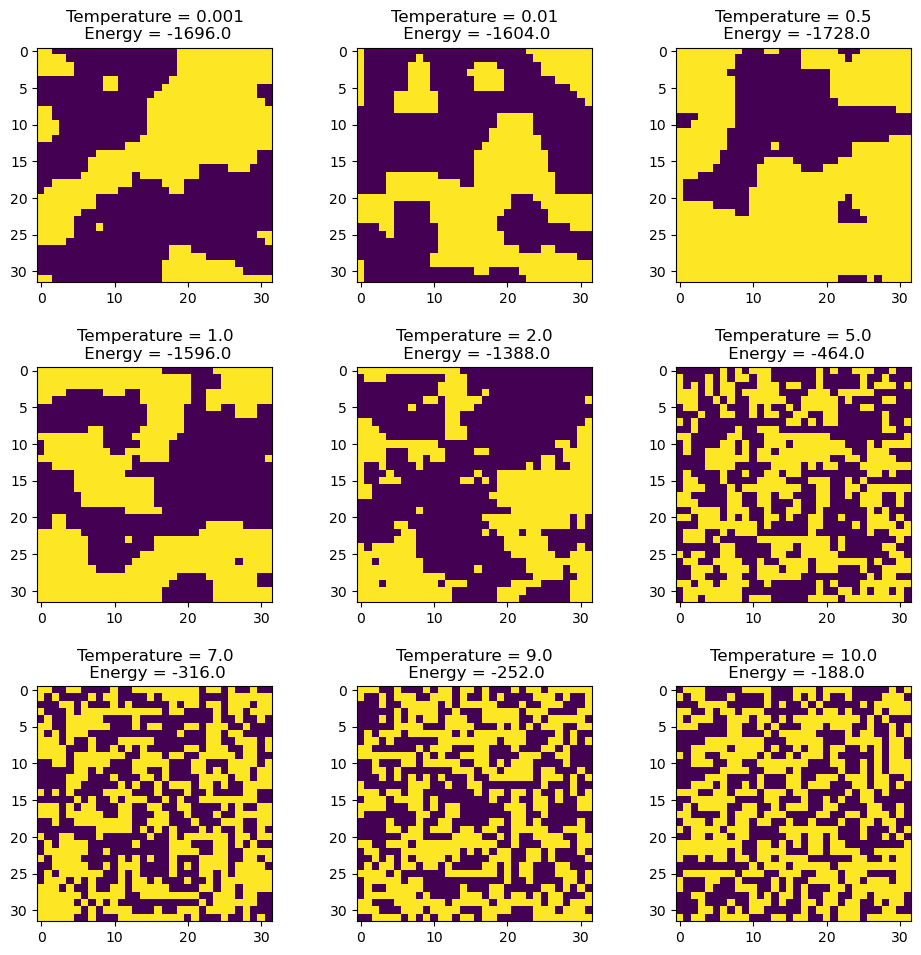

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Function to initialize the spin configuration randomly
def initialize_spin_configuration(size):
    return np.random.choice([-1, 1], size=(size, size))

# Function to calculate the energy of the system
def calculate_energy(spins, J):
    energy = 0
    for i in range(spins.shape[0]):
        for j in range(spins.shape[1]):
            energy += -J * spins[i, j] * (spins[(i + 1) % spins.shape[0], j] + spins[i, (j + 1) % spins.shape[1]])
    return energy

# Function to perform a Monte Carlo step using the Metropolis algorithm
def monte_carlo_step(spins, J, temperature):
    i, j = np.random.randint(spins.shape[0]), np.random.randint(spins.shape[1])
    dE = 2 * J * spins[i, j] * (spins[(i + 1) % spins.shape[0], j] + spins[(i - 1) % spins.shape[0], j] +
                                 spins[i, (j + 1) % spins.shape[1]] + spins[i, (j - 1) % spins.shape[1]])
    
    if dE < 0 or np.random.random() < np.exp(-dE / temperature):
        spins[i, j] *= -1

# Function to perform the Monte Carlo simulation
def monte_carlo_simulation(size, J, temperature, num_steps):
    spins = initialize_spin_configuration(size)
    energies = []

    for step in range(num_steps):
        monte_carlo_step(spins, J, temperature)
        if step % 100 == 0:
            energies.append(calculate_energy(spins, J))

    return spins, np.array(energies)

# Parameters

#size = 20
#J = 1.0
#temperature = 2.0
#num_steps = 10000


fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.tight_layout(pad=3.0)


# Perform the simulation
# final_spin_configuration, energies = monte_carlo_simulation(size, J, temperature, num_steps)

# Plot the final spin configuration

temp = [[0.001, 0.01, 0.5],[1.0, 2.0, 5.0],[7.0, 9.0, 10.0]]

for i in range(3):
    for j in range(3):
        final_spin_configuration, _ = monte_carlo_simulation(size=32, J=1.0, temperature=temp[i][j], num_steps=10000)
        axes[i, j].imshow(final_spin_configuration)
        axes[i, j].set_title(f'Temperature = {temp[i][j]}\n Energy = {calculate_energy(final_spin_configuration, J)}')

plt.show()

-164.0